In [1]:
import riskfolio as rp 
import pyfolio as pf
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns

/Users/saadabdullah/Desktop/Data Science/GitHub/Financial-Markets-Analysis/venv/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [14]:
assets = [
    'CRWD',
    'PANW',
    'AAPL',
    'MSFT',
    'GOOG',
    'TSLA',
    'DIS',
    'AXP',
    'GLD',
    '^GSPC',
    'QBTS',
    'HIMS',
    'SOUN',
    'AXON',
    'TSM',
    'AMD',
    'NVDA',
    'RR',
    'UBER'
]

data = yf.download(assets, start='2018-01-01', end = '2025-08-07')
data = data.loc[:, "Adj Close"]
data

/var/folders/3v/wc4cv1c5015_bssv4wn_bwkc0000gn/T/ipykernel_23353/1242650237.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start='2018-01-01', end = '2025-08-07')
[*********************100%***********************]  19 of 19 completed


KeyError: 'Adj Close'

In [12]:
returns = data.pct_change().dropna()
returns 
returns.median().sort_values(ascending=False).to_frame(name='median_return')

,median_return
Ticker,
HIMS,0.005616
NVDA,0.003931
GOOG,0.003145
PANW,0.002995
TSM,0.002895
CRWD,0.002241
GLD,0.001766
AXON,0.001697
AXP,0.001173


<Axes: >

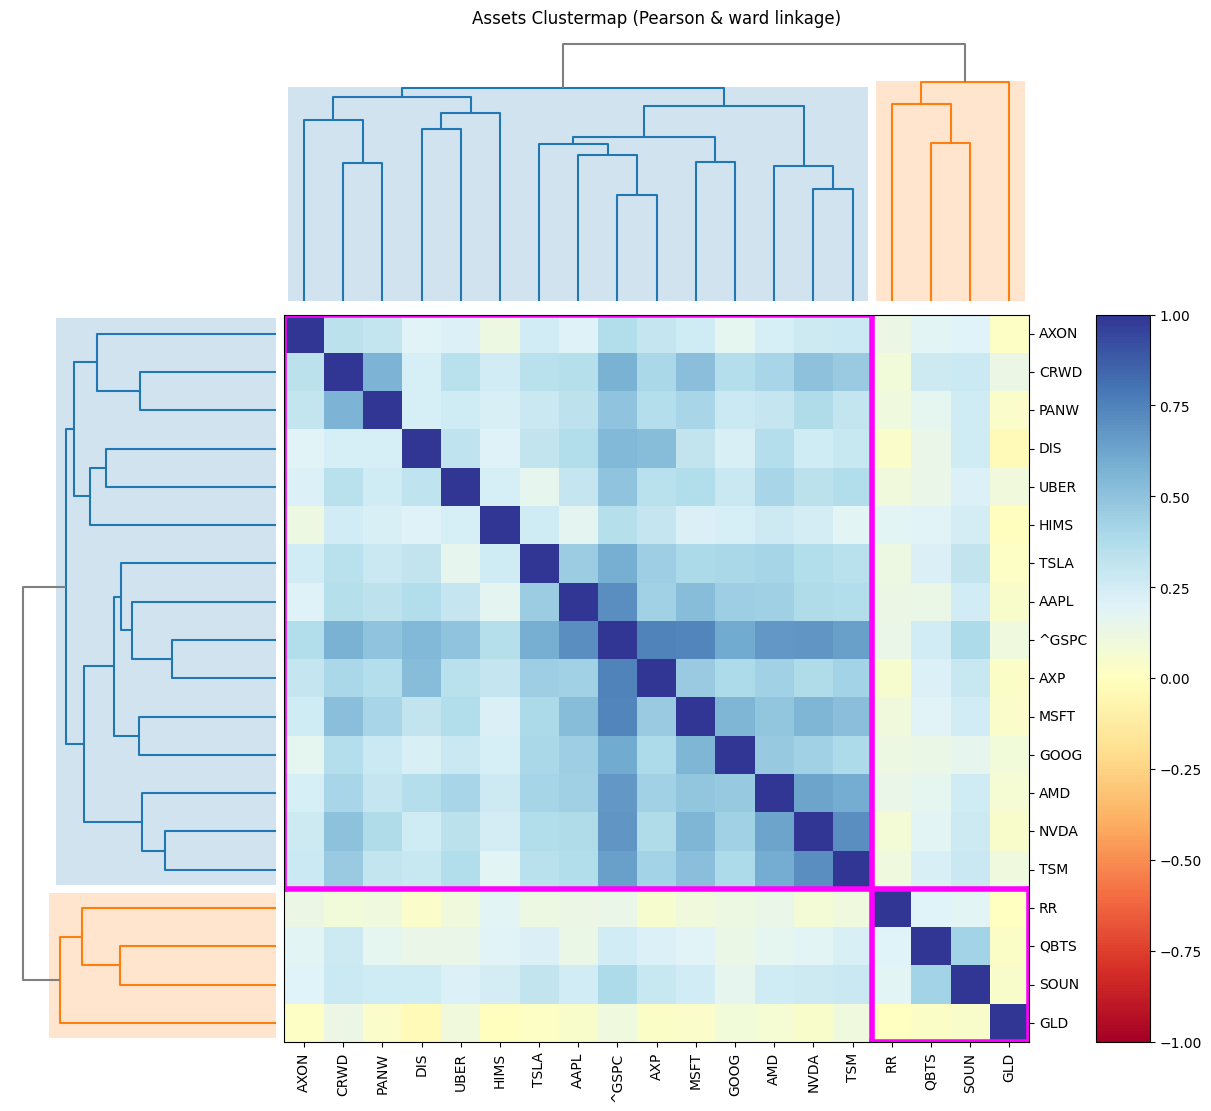

In [13]:
rp.plot_clusters(
    returns=returns,
    codependence='pearson',
    linkage='ward',
    k=None,
    max_k=10,
    leaf_order=True,
    dendrogram=True,
    ax=None
)

[************          26%                       ]  5 of 19 completed

[*********************100%***********************]  19 of 19 completed



Median Returns:
         median_return
Ticker               
HIMS         0.005616
NVDA         0.003931
GOOG         0.003145
PANW         0.002995
TSM          0.002895
CRWD         0.002241
GLD          0.001766
AXON         0.001697
AXP          0.001173
AAPL         0.001172
MSFT         0.001167
^GSPC        0.001104
AMD          0.000399
DIS          0.000289
UBER         0.000287
TSLA        -0.000261
SOUN        -0.005831
QBTS        -0.007693
RR          -0.010582


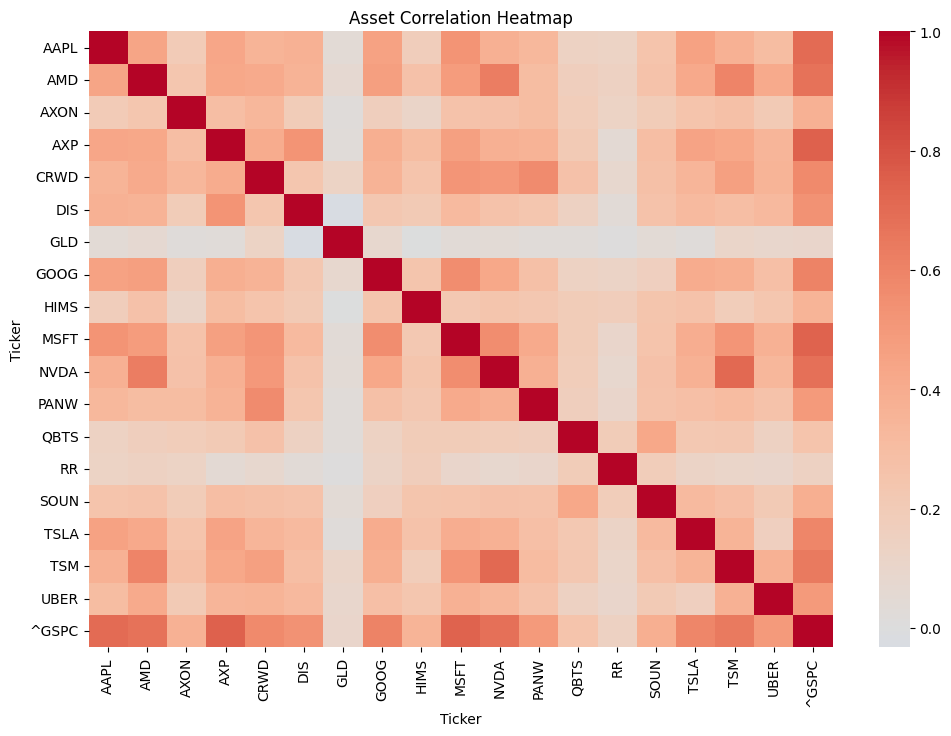


Asset pairs with correlation magnitude below 0.3:
AAPL - AXON: correlation = 0.204
AAPL - GLD: correlation = 0.041
AAPL - HIMS: correlation = 0.179
AAPL - QBTS: correlation = 0.134
AAPL - RR: correlation = 0.131
AAPL - SOUN: correlation = 0.254
AAPL - UBER: correlation = 0.298
AMD - AXON: correlation = 0.238
AMD - GLD: correlation = 0.068
AMD - HIMS: correlation = 0.271
AMD - PANW: correlation = 0.299
AMD - QBTS: correlation = 0.168
AMD - RR: correlation = 0.143
AMD - SOUN: correlation = 0.262
AXON - AXP: correlation = 0.297
AXON - DIS: correlation = 0.194
AXON - GLD: correlation = 0.020
AXON - GOOG: correlation = 0.171
AXON - HIMS: correlation = 0.120
AXON - MSFT: correlation = 0.262
AXON - NVDA: correlation = 0.269
AXON - QBTS: correlation = 0.184
AXON - RR: correlation = 0.130
AXON - SOUN: correlation = 0.197
AXON - TSLA: correlation = 0.254
AXON - TSM: correlation = 0.279
AXON - UBER: correlation = 0.212
AXP - GLD: correlation = 0.030
AXP - QBTS: correlation = 0.211
AXP - RR: corr

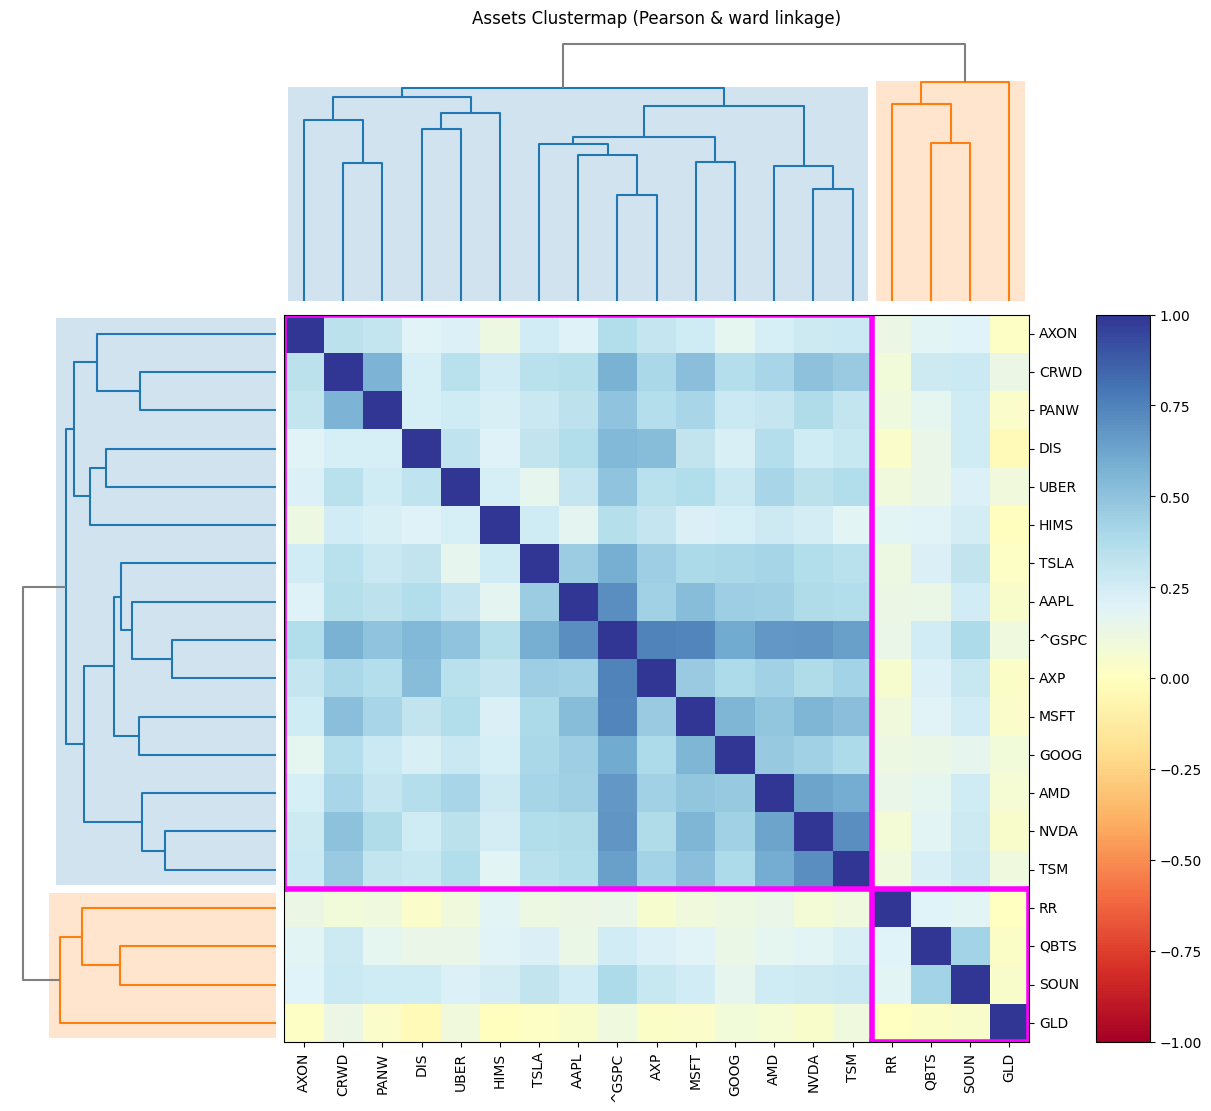

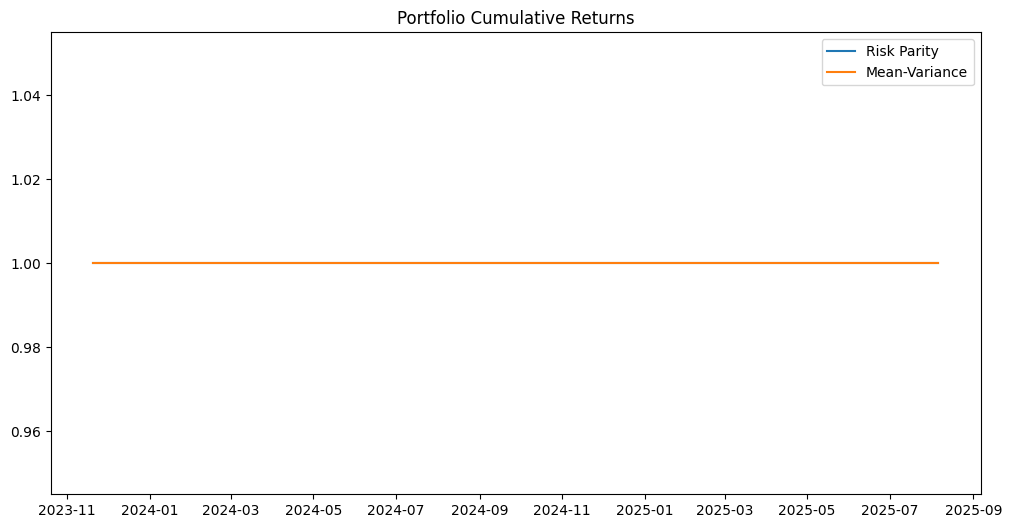

In [22]:
"""
Ray Dalio-style Correlation & Portfolio Script
Includes:
- Download data
- Compute returns & correlations
- Show correlation clusters
- Identify uncorrelated asset pairs
- Run Risk Parity & Mean-Variance portfolios
- Show portfolio performances and weights
"""

import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import riskfolio as rp
from collections import Counter

# ------------------------------------------
# 1) Asset list
# ------------------------------------------
assets = [
    'CRWD', 'PANW', 'AAPL', 'MSFT', 'GOOG', 'TSLA', 'DIS', 'AXP', 'GLD', '^GSPC',
    'QBTS', 'HIMS', 'SOUN', 'AXON', 'TSM', 'AMD', 'NVDA', 'RR', 'UBER'
]

# ------------------------------------------
# 2) Download Data
# ------------------------------------------
print("Downloading data...")
data = yf.download(assets, start='2018-01-01', end='2025-08-07')
data = data.loc[:, "Close"]

# ------------------------------------------
# 3) Compute returns
# ------------------------------------------
returns = data.pct_change().dropna()

# ------------------------------------------
# 4) Median return ranking
# ------------------------------------------
median_returns = returns.median().sort_values(ascending=False).to_frame(name='median_return')
print("\nMedian Returns:\n", median_returns)

# ------------------------------------------
# 5) Correlation matrix and cluster plot
# ------------------------------------------
corr_matrix = returns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Asset Correlation Heatmap')
plt.show()

rp.plot_clusters(
    returns=returns,
    codependence='pearson',
    linkage='ward',
    k=None,
    max_k=10,
    leaf_order=True,
    dendrogram=True
)

# ------------------------------------------
# 6) Find uncorrelated asset pairs
# ------------------------------------------
threshold = 0.3

uncorr_pairs = []
assets_list = corr_matrix.columns.tolist()

for i in range(len(assets_list)):
    for j in range(i+1, len(assets_list)):
        asset1 = assets_list[i]
        asset2 = assets_list[j]
        corr_val = corr_matrix.loc[asset1, asset2]
        if abs(corr_val) < threshold:
            uncorr_pairs.append((asset1, asset2, corr_val))

print(f"\nAsset pairs with correlation magnitude below {threshold}:")
for a1, a2, c in uncorr_pairs:
    print(f"{a1} - {a2}: correlation = {c:.3f}")

counter = Counter()
for a1, a2, _ in uncorr_pairs:
    counter[a1] += 1
    counter[a2] += 1

print("\nNumber of uncorrelated partners per asset:")
for asset, count in counter.most_common():
    print(f"{asset}: {count}")

# ------------------------------------------
# 7) Portfolio helpers
# ------------------------------------------
def portfolio_returns(weights, returns_df):
    w = np.asarray(weights).reshape(-1)
    assert len(w) == returns_df.shape[1], "Weight length must match number of assets"
    return returns_df.dot(w)

def performance_stats(portfolio_rets):
    ann_return = np.mean(portfolio_rets) * 252
    ann_vol = np.std(portfolio_rets) * np.sqrt(252)
    sharpe = ann_return / ann_vol if ann_vol != 0 else 0
    return pd.Series({
        "Annual Return": ann_return,
        "Annual Volatility": ann_vol,
        "Sharpe Ratio": sharpe
    })

# ------------------------------------------
# 8) Portfolio optimization
# ------------------------------------------
pf = rp.Portfolio(returns=returns.dropna())
pf.assets_stats(method_mu="hist", method_cov="hist")

# Risk Parity
w_rp_df = pf.rp_optimization(model="Classic", rm="MV", rf=0)
if isinstance(w_rp_df, pd.Series):
    w_rp_df = w_rp_df.to_frame().T
w_rp_df = w_rp_df.reindex(columns=returns.columns).fillna(0)
w_rp = w_rp_df.iloc[0].values

ret_rp = portfolio_returns(w_rp, returns)
stats_rp = performance_stats(ret_rp)

# Mean-Variance (Sharpe maximization)
w_mv_df = pf.optimization(model="Classic", rm="MV", obj="Sharpe", rf=0, l=0)
if isinstance(w_mv_df, pd.Series):
    w_mv_df = w_mv_df.to_frame().T
w_mv_df = w_mv_df.reindex(columns=returns.columns).fillna(0)
w_mv = w_mv_df.iloc[0].values

ret_mv = portfolio_returns(w_mv, returns)
stats_mv = performance_stats(ret_mv)

# ------------------------------------------
# 9) Summary and print weights
# ------------------------------------------
summary = pd.DataFrame({
    "Risk Parity": stats_rp,
    "Mean-Variance": stats_mv
})
print("\nPortfolio Performance Summary:\n", summary)

print("\nRisk Parity Weights:")
print(pd.Series(w_rp, index=returns.columns).sort_values(ascending=False))

print("\nMean-Variance Weights:")
print(pd.Series(w_mv, index=returns.columns).sort_values(ascending=False))

# ------------------------------------------
# 10) Plot cumulative returns
# ------------------------------------------
cum_rp = (1 + ret_rp).cumprod()
cum_mv = (1 + ret_mv).cumprod()

plt.figure(figsize=(12,6))
plt.plot(cum_rp, label="Risk Parity")
plt.plot(cum_mv, label="Mean-Variance")
plt.title("Portfolio Cumulative Returns")
plt.legend()
plt.show()
